# introductory text (explain: dataset, task)

The dataset I chose was a wine dataset. This dataset contains various chemical properties of red wines, such as acidity levels, sugar content, pH value, alcohol content, etc. It also includes a quality rating for each wine, which is a subjective measure provided by human tasters.

so taking this I was wondering if it would be possible to have a data model that allows to have a somewhat way for wine testers to maybe get a grip on what and how a wine can be good or bad.

# import requisite modules

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# helper functions (if necessary)

In [27]:
# python code

# pre-process, analyze dataset

In [28]:
# Data set https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

data = pd.read_csv("winequality-red.csv", delimiter=";")

data.fillna(data.mean(), inplace=True)

print(data.describe())

correlation_matrix = data.corr()
print(correlation_matrix)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

# visualize dataset

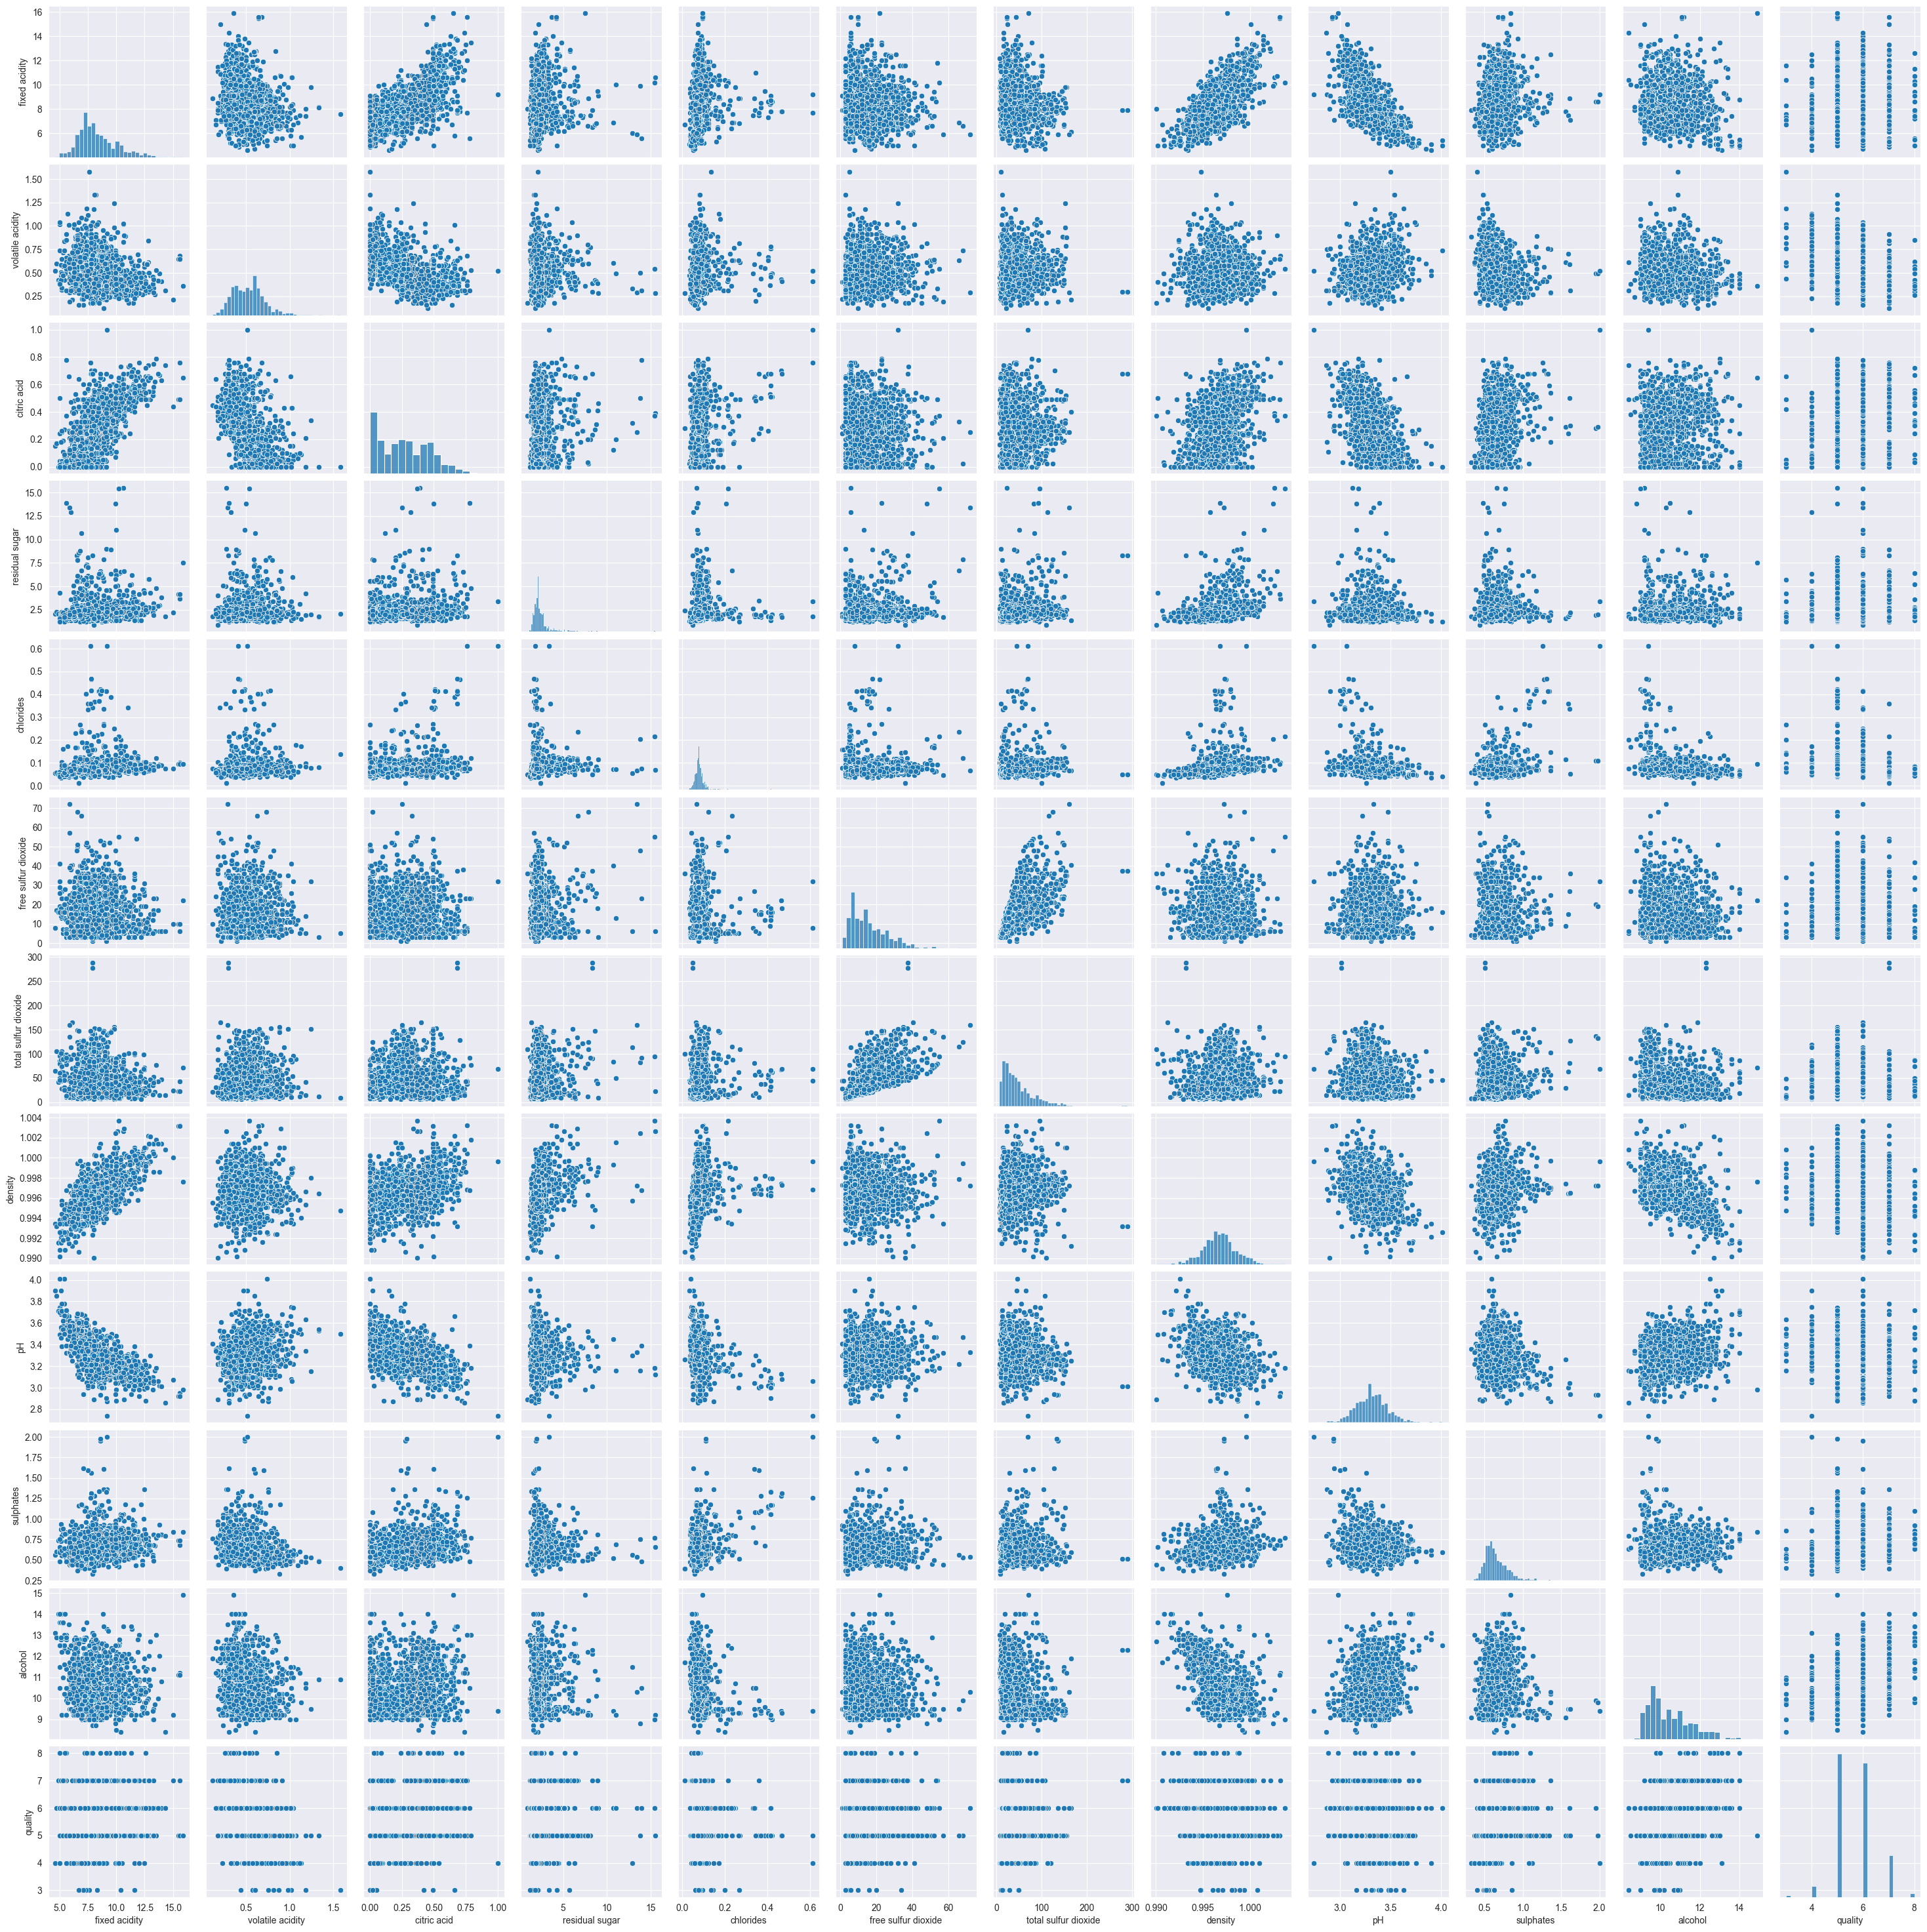

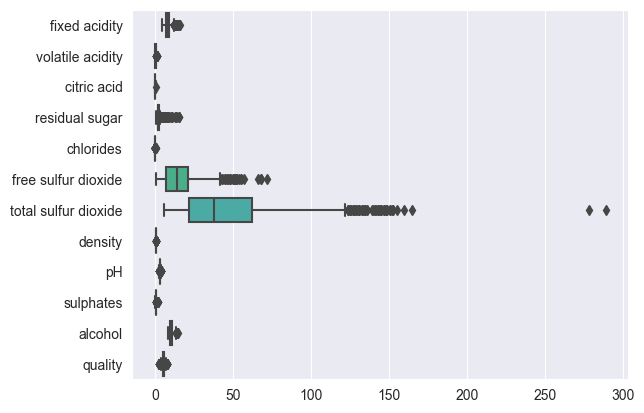

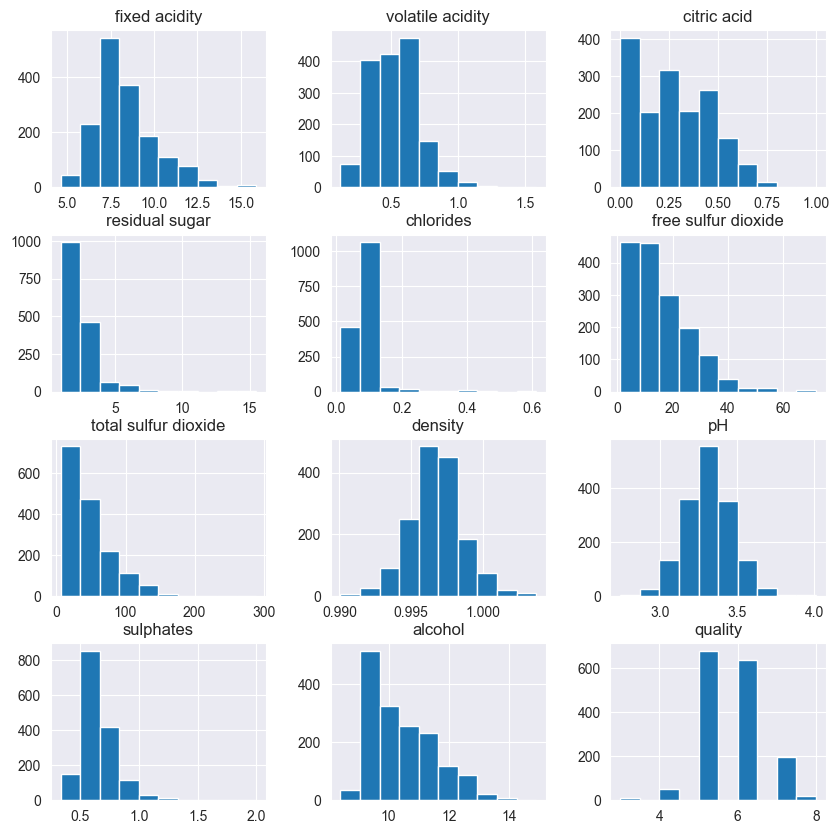

In [29]:
# Scatter
sns.pairplot(data)
plt.show()

# Box
sns.boxplot(data=data, orient="h")
plt.show()

# Histo
data.hist(figsize=(10, 10))
plt.show()

# experiment with algorithms, feature sets, parameters, etc.,

In [30]:
X = data.drop("quality", axis=1)
y = data["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Support Vector Regression
svr = SVR(kernel='linear', C=1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

# visualize experimental results

In [31]:
# Mean Squared Error
print("Mean Squared Error: ")
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Support Vector Regression MSE:", mean_squared_error(y_test, y_pred_svr))

print()

# R-squared Score
print("R-squared score: ")
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Support Vector Regression R2:", r2_score(y_test, y_pred_svr))

Mean Squared Error: 
Linear Regression MSE: 0.39002514396395493
Random Forest MSE: 0.3006603124999999
Support Vector Regression MSE: 0.39663419885253093

R-squared score: 
Linear Regression R2: 0.4031803412796219
Random Forest R2: 0.5399271357910311
Support Vector Regression R2: 0.3930671115453136


# analyze / explain experimental results

Given the data and testing above...

Mean Squared Error
the lower MSE values indicate better model performance. In my case of the red wine, the Random Forest model has the lowest MSE (0.3007), followed by Linear Regression (0.3900) and Support Vector Regression (0.3966).

R-squared
R2 scores range from 0 to 1, with higher values indicating better model performance. In our case, the Random Forest model has the highest R2 score (0.5399), followed by Linear Regression (0.4032) and Support Vector Regression (0.3931).

Based on both the MSE and R2 scores, the Random Forest model outperforms the other two models in predicting wine quality. This is likely because Random Forest, an ensemble learning method, can capture more complex relationships between features and the target variable compared to the other models. The combination of multiple decision trees in the Random Forest model also helps reduce over-fitting and improve generalization to unseen data.



# conclusion 

In conclusion, using the Wine Quality dataset, we aimed to predict wine quality based on physicochemical properties. We experimented with three algorithms - Linear Regression, Random Forest, and Support Vector Regression. The Random Forest model yielded the best performance, as indicated by the lowest MSE and highest R2 scores. This suggests that the Random Forest model is better suited for predicting wine quality based on the given dataset compared to the other two models.